## Libraries

In [122]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

## Data Gathering

In [32]:
df = pd.read_csv('Data/train.csv')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [6]:
df.label.unique()

array([0, 1], dtype=int64)

In [7]:
df.label.value_counts()

0    20019
1    19981
Name: label, dtype: int64

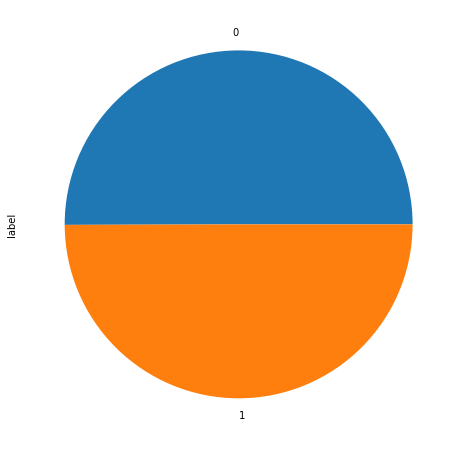

In [9]:
df.label.value_counts().plot(kind='pie', figsize=(20,8))

## Data Preprocessing

In [93]:
def text_prepare(text):
    wordnet = WordNetLemmatizer()
    STOPWORDS = set(stopwords.words('english'))
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [i for i in tokens if len(i)>2]
    tokens = [i for i in tokens if i.isalpha()]
    tokens = [i for i in tokens if i not in STOPWORDS]
    tokens = [wordnet.lemmatize(i) for i in tokens]
    return tokens

In [34]:
text_prepare("Heelo how are you ? 123 bab wolves cats dogs")

['heelo', 'bab', 'wolf', 'cat', 'dog']

In [35]:
df['text'] = df['text'].apply(lambda x: text_prepare(x))

In [37]:
freq_count = {}

In [39]:
for line in df['text']:
    for word in line:
        if word not in freq_count:
            freq_count[word] = 1
        else:
            freq_count[word] += 1


In [43]:
freq_count_sorted = {k: v for k, v in sorted(freq_count.items(), key=lambda item: item[1], reverse=True)}

In [51]:
SET_LIMIT = 5000

In [67]:
word_index_map = {v:k for k,v in enumerate(list(freq_count_sorted.keys())[:SET_LIMIT])}

In [68]:
word_index_map

{'movie': 0,
 'film': 1,
 'one': 2,
 'like': 3,
 'time': 4,
 'good': 5,
 'character': 6,
 'would': 7,
 'even': 8,
 'get': 9,
 'story': 10,
 'make': 11,
 'see': 12,
 'really': 13,
 'scene': 14,
 'well': 15,
 'much': 16,
 'could': 17,
 'people': 18,
 'also': 19,
 'great': 20,
 'bad': 21,
 'first': 22,
 'show': 23,
 'way': 24,
 'thing': 25,
 'made': 26,
 'think': 27,
 'life': 28,
 'know': 29,
 'watch': 30,
 'love': 31,
 'many': 32,
 'seen': 33,
 'actor': 34,
 'plot': 35,
 'two': 36,
 'say': 37,
 'never': 38,
 'look': 39,
 'acting': 40,
 'end': 41,
 'little': 42,
 'best': 43,
 'year': 44,
 'ever': 45,
 'better': 46,
 'man': 47,
 'take': 48,
 'come': 49,
 'still': 50,
 'work': 51,
 'part': 52,
 'find': 53,
 'something': 54,
 'give': 55,
 'want': 56,
 'lot': 57,
 'back': 58,
 'director': 59,
 'watching': 60,
 'real': 61,
 'guy': 62,
 'performance': 63,
 'woman': 64,
 'play': 65,
 'though': 66,
 'actually': 67,
 'another': 68,
 'funny': 69,
 'nothing': 70,
 'role': 71,
 'going': 72,
 'new': 7

In [69]:
def text_vector(text, label):
    x = np.zeros(len(word_index_map)+1)
    for word in text:
        if word in word_index_map:
            index = word_index_map[word]
            x[index] += 1
        
    x = x/x.sum()
    x[-1] = label
    return x 

In [72]:
data = np.zeros((len(df), len(word_index_map)+1))

In [74]:
idx = 0
index = 0
for idx in range(len(df)):
    tokens = df.iloc[idx,0]
    label = df.iloc[idx,1]
    data[index,:] = text_vector(tokens, label)
    index += 1

## Data Modelling

In [77]:
X = data[:,:-1]
y = data[:,-1]

array([0., 0., 0., ..., 0., 1., 1.])

In [79]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
model.score(X,y)

0.825675

In [84]:
threshold = 0.5
for word,index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word,":",weight)

film : 1.7392197875840534
one : 1.3219897498970756
time : 1.5721274045781148
good : 3.2057019754811744
story : 3.964825402114983
see : 5.136258829921413
well : 8.066403890198906
also : 6.989523048191525
great : 16.929829885729294
first : 1.328261707350689
show : 3.2276191229287376
way : 1.165996854918003
think : 2.1085979294430146
life : 6.825639653112025
watch : 0.7311976951875317
love : 9.815323199827857
many : 2.838868804003054
seen : 2.1633812693516976
two : 1.104513340536365
little : 0.9513266611360243
best : 10.651688451321618
year : 4.832958520649117
man : 2.3224094192681988
take : 1.1226174178515123
still : 5.175886303430347
work : 1.9859891233527847
find : 2.974786829400992
give : 0.6077130907834997
lot : 1.7250454869357432
back : 0.5858836454691935
real : 1.2050919856680573
performance : 5.513897171946627
play : 2.602203447752659
though : 1.4665811929077566
funny : 0.7151421597732218
role : 3.1273654065446563
new : 2.019888964435377
every : 0.5858786584997399
world : 4.744435

## Exploring Test data

In [91]:
test_data = pd.read_csv('Data/Test.csv')
test_data.head(5)

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [94]:
test_data['text'] = test_data['text'].apply(lambda x: text_prepare(x))

In [96]:
data2 = np.zeros((len(test_data), len(word_index_map)+1))

In [105]:
idx = 0
index = 0
for idx in range(len(test_data)):
    tokens = test_data.iloc[idx,0]
    label = test_data.iloc[idx,1]
    data2[index,:] = text_vector(tokens, label)
    index += 1

In [106]:
X_test = data2[:,:-1]
y_test = data2[:,-1]

In [110]:
model.predict(X_test)

array([1., 0., 0., ..., 0., 0., 0.])

In [109]:
model.score(X_test,y_test)

0.826

## Conclusion

- The model score is good enough
- Positive and Negative Impact words are listed below

### Words Having *Positive* Impact

In [159]:
threshold = 0.8
positive_score = {}
for word,index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        positive_score[word] = weight

In [156]:
positive_score = {k: v for k, v in sorted(positive_score.items(), key=lambda item: item[1], reverse=True)}
positive_score

{'great': 16.929829885729294,
 'best': 10.651688451321618,
 'love': 9.815323199827857,
 'excellent': 8.563185284875495,
 'well': 8.066403890198906,
 'also': 6.989523048191525,
 'life': 6.825639653112025,
 'wonderful': 6.632445905379842,
 'loved': 5.640373131344323,
 'performance': 5.513897171946627,
 'perfect': 5.459785727294509,
 'amazing': 5.260666545366126,
 'fun': 5.223777326297155,
 'still': 5.175886303430347,
 'see': 5.136258829921413,
 'favorite': 5.085214703890855,
 'beautiful': 5.049694067191014,
 'year': 4.832958520649117,
 'world': 4.744435561577412,
 'always': 4.425890595266026,
 'enjoyed': 4.419208040473799,
 'definitely': 4.399505105008522,
 'brilliant': 4.331654551332786,
 'highly': 4.191937686696344,
 'especially': 4.0909897720920885,
 'family': 4.003970282073128,
 'story': 3.964825402114983,
 'dvd': 3.8937676923814752,
 'series': 3.6203890692064635,
 'classic': 3.5019659730192507,
 'today': 3.487733629503789,
 'enjoy': 3.470338070713532,
 'true': 3.39079019169872,
 're

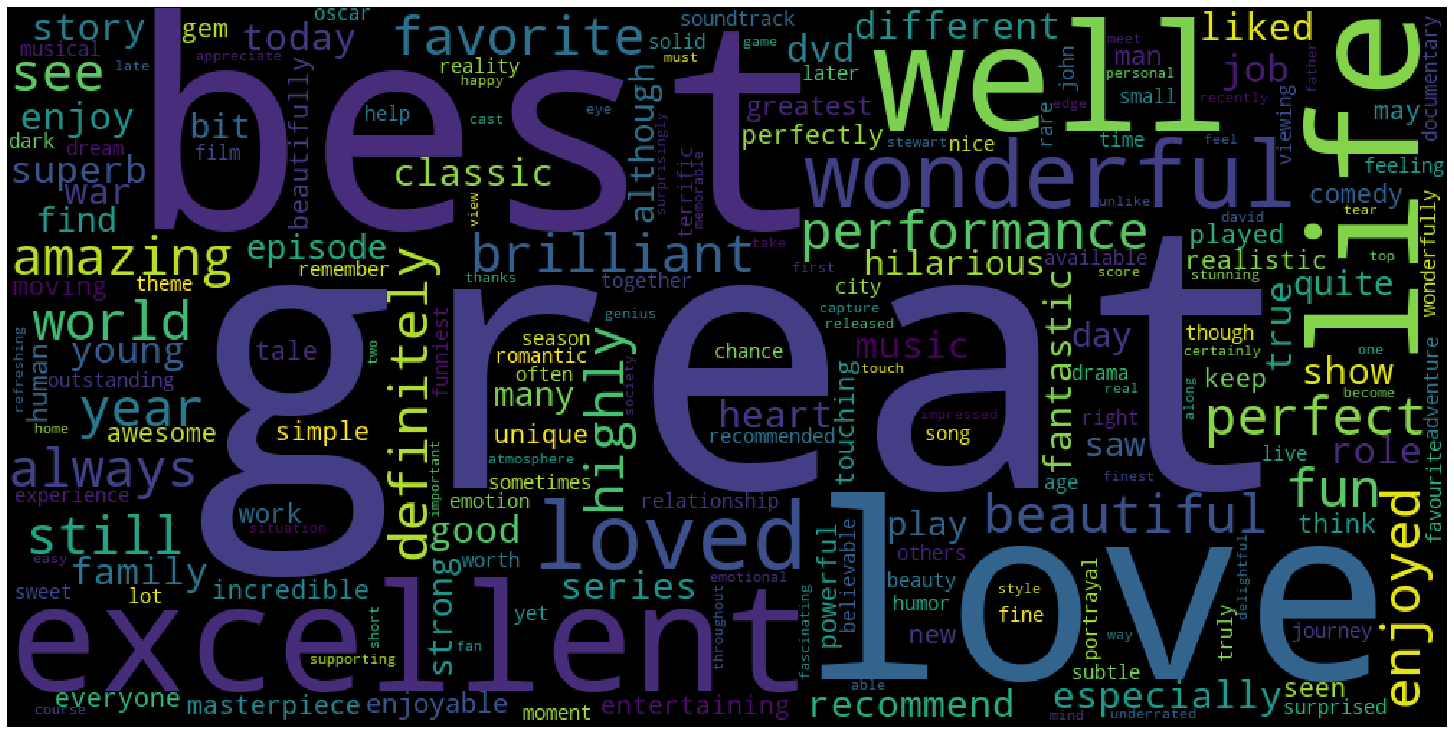

In [158]:
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(list(positive_score.keys())))
plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Words Having *Negative* Impact

In [161]:
threshold = 1
negative_score = {}
for word,index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        negative_score[word] = weight

In [166]:
negative_score = {k: v for k, v in sorted(negative_score.items(), key=lambda item: item[1], reverse=False)}
negative_score

{'bad': -19.396015864803996,
 'worst': -13.643463092913443,
 'even': -10.03993567817434,
 'nothing': -9.103600352344321,
 'waste': -8.781012172363807,
 'awful': -8.30524610434069,
 'minute': -7.8710866292588255,
 'boring': -7.867793640121696,
 'could': -7.8347458225580136,
 'terrible': -7.349627796634996,
 'plot': -7.261141542451874,
 'would': -6.839267112466065,
 'poor': -6.813669972288924,
 'script': -6.5534758854496715,
 'acting': -6.365158267697694,
 'stupid': -6.311531123705895,
 'money': -5.737007435476042,
 'worse': -5.571559511319049,
 'horrible': -5.449930918070017,
 'instead': -4.822039826851128,
 'least': -4.726431469930142,
 'supposed': -4.482396902070349,
 'thing': -4.2847332194144805,
 'better': -4.25899662444049,
 'reason': -3.9641188857031713,
 'look': -3.949698198733267,
 'attempt': -3.9195885745966197,
 'crap': -3.771641371010622,
 'dull': -3.7228328164007305,
 'avoid': -3.7063882341671976,
 'idea': -3.7003440207099683,
 'like': -3.688912931215541,
 'hour': -3.6806564

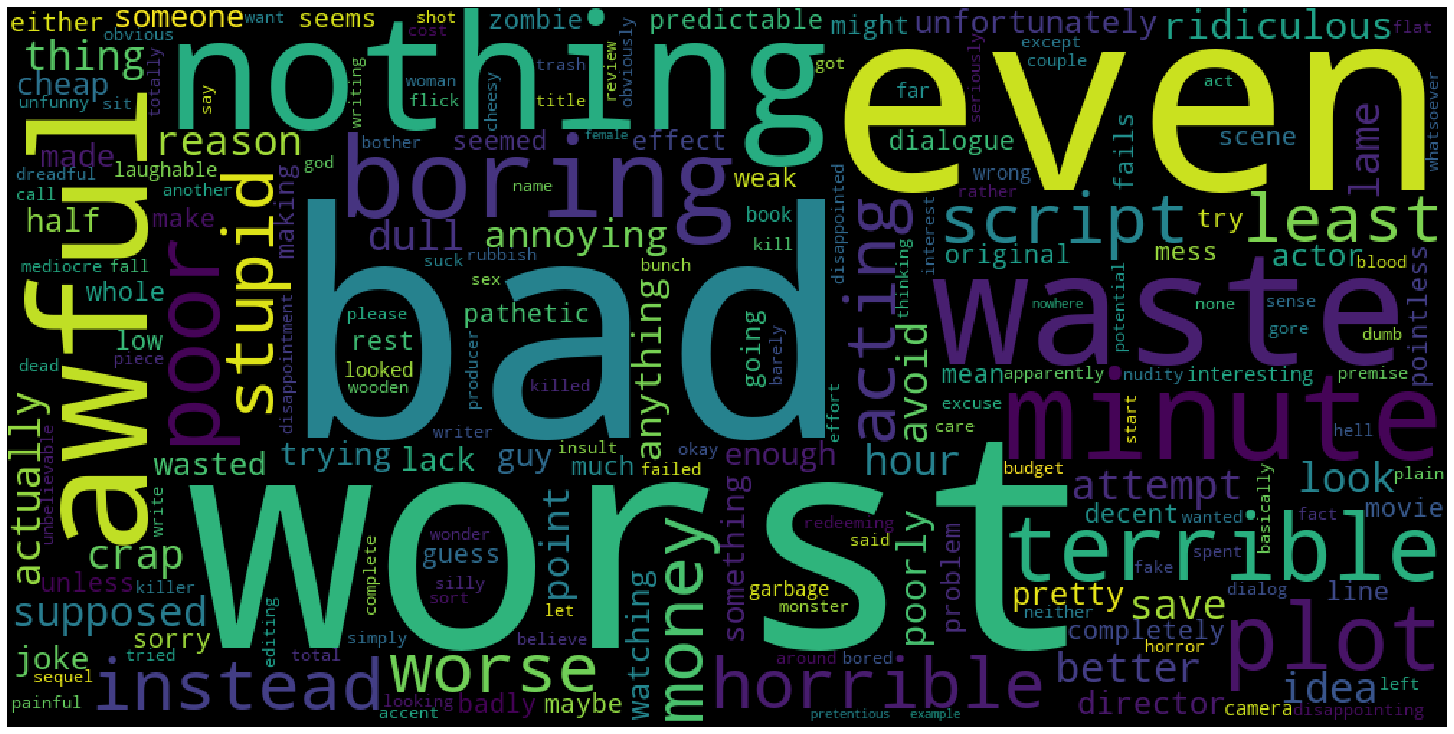

In [167]:
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(list(negative_score.keys())))
plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)  
plt.show() 